
## Data Cleaning and management

In [1]:
## import all the libraries

import os
import json
import pandas as pd
import geopandas as gp
from geopandas import GeoDataFrame
import numpy as np
import contextily as ctx
import descartes as dsc
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc, cm
from bokeh.io import output_file, show
from bokeh.layouts import column, row, widgetbox, layout
from bokeh.palettes import brewer,Viridis4,Viridis, Blues8
from bokeh.plotting import figure,curdoc, output_file, show, ColumnDataSource
from bokeh.models.widgets import Tabs, Panel
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,CustomJS, CustomJSFilter, GeoJSONDataSource,Legend, 
                          LegendItem, Button,HoverTool,LinearColorMapper, Slider,LabelSet,CheckboxGroup, BasicTicker,  
                          PrintfTickFormatter,Div, Select, Label)
from bokeh.core.properties import value
from bokeh.models.ranges import FactorRange
from bokeh.transform import transform,cumsum, linear_cmap
from sklearn import preprocessing
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from bokeh.events import Tap

In [2]:
wd = os.getcwd()
wd

'C:\\Users\\35196\\Desktop\\Final Project Data Viz'

In [3]:
## read companylist file 
companylist = pd.read_csv('BasicCompanyDataAsOneFile-2020-11-01.csv')
companylist.head()

C:\Users\35196\anaconda3\envs\smm635_gp\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (39,40,41,42,43,44,45,46,47,48,49,50,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
0,! LIMITED,12778855,NaN,NaN,UNIT 3 NEWTON BUSINESS CENTRE,NEWTON CHAMBERS ROAD,SHEFFIELD,NaN,UNITED KINGDOM,S35 2PH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/08/2021,NaN
1,! LTD,08209948,NaN,NaN,METROHOUSE 57 PEPPER ROAD,HUNSLET,LEEDS,YORKSHIRE,NaN,LS10 2RU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25/09/2021,11/09/2020
2,!? LTD,11399177,NaN,NaN,THE STUDIO HATHERLOW HOUSE,HATHERLOW,ROMILEY,NaN,UNITED KINGDOM,SK6 3DY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19/06/2021,05/06/2020
3,!BIG IMPACT GRAPHICS LIMITED,11743365,NaN,NaN,372 OLD STREET,335 ROSDEN HOUSE,LONDON,NaN,UNITED KINGDOM,EC1V 9LT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/02/2021,27/12/2019
4,!L PRODUCTIONS LIMITED,12402527,NaN,NaN,95 MARMION AVENUE,NaN,CHINGFORD,NaN,ENGLAND,E4 8EJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24/02/2021,NaN


In [4]:
# load list of SIC Code for digital and traditional industries companies
digitdf = pd.read_excel ('SIC_Code.xlsx',sheet_name="Sheet1")
manudf = pd.read_excel('SIC_Code.xlsx', sheet_name="Sheet2")
finadf = pd.read_excel('SIC_Code.xlsx', sheet_name="Sheet4")


In [5]:
df=pd.DataFrame(companylist)[['CompanyName','CountryOfOrigin','IncorporationDate','CompanyStatus','Accounts.NextDueDate','RegAddress.PostTown','RegAddress.PostCode','SICCode.SicText_1']]

In [6]:
# Insert new column of "Year", "SIC Code" and "postcode" for further data management
df['Year']=df['IncorporationDate'].str[6:10]
df['SICCode']=df['SICCode.SicText_1'].str[0:5]
df['postcode']=df['RegAddress.PostCode'].str[0:4]+df['RegAddress.PostCode'].str[5:8]
df['postcode1']=df['RegAddress.PostCode'].str[0:3]
df['number']=1
df

,CompanyName,CountryOfOrigin,IncorporationDate,CompanyStatus,Accounts.NextDueDate,RegAddress.PostTown,RegAddress.PostCode,SICCode.SicText_1,Year,SICCode,postcode,postcode1,number
0,! LIMITED,United Kingdom,29/07/2020,Active,29/04/2022,SHEFFIELD,S35 2PH,78300 - Human resources provision and manageme...,2020,78300,S35 PH,S35,1
1,! LTD,United Kingdom,11/09/2012,Active,30/06/2021,LEEDS,LS10 2RU,99999 - Dormant Company,2012,99999,LS102RU,LS1,1
2,!? LTD,United Kingdom,05/06/2018,Active,30/06/2021,ROMILEY,SK6 3DY,47710 - Retail sale of clothing in specialised...,2018,47710,SK6 DY,SK6,1
3,!BIG IMPACT GRAPHICS LIMITED,United Kingdom,28/12/2018,Active,28/12/2020,LONDON,EC1V 9LT,18129 - Printing n.e.c.,2018,18129,EC1V9LT,EC1,1
4,!L PRODUCTIONS LIMITED,United Kingdom,14/01/2020,Active,14/10/2021,CHINGFORD,E4 8EJ,90030 - Artistic creation,2020,90030,E4 8J,E4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785585,“THE GREENHOUSE” COMPANY LTD,United Kingdom,10/07/2018,Active,30/04/2021,SHREWSBURY,SY1 1XF,56101 - Licensed restaurants,2018,56101,SY1 XF,SY1,1
4785586,“THE SKULL” SAUCE COMPANY LTD,United Kingdom,28/04/2020,Active,28/01/2022,MUSSELBURGH,EH21 6UQ,10840 - Manufacture of condiments and seasonings,2020,10840,EH216UQ,EH2,1
4785587,€URI UK LIMITED,United Kingdom,25/05/2018,Active - Proposal to Strike off,25/02/2020,LIVERPOOL,L3 1BP,64999 - Financial intermediation not elsewhere...,2018,64999,L3 1P,L3,1
4785588,€URO IMPORTS LIMITED,United Kingdom,16/08/2012,Active,31/03/2021,PRESTON,PR2 2DX,46160 - Agents involved in the sale of textile...,2012,46160,PR2 DX,PR2,1


In [7]:
# obtain list of SIC Code for digital technology companies
digitlist=list(digitdf['SICCode'])
manufaclist=list(manudf['SICCode'])
finalist=list(finadf['SICCode'])

In [8]:
# load shape file for postal district 
Codepoint=gp.read_file('CodePointOpen_London_201709.shp')
Codepoint

,postcode,eastings,northings,ward14_nm,ward14_cd,boroughcd,borough,lsoa11_cd,lsoa11_nm,msoa11_cd,msoa11_nm,rgn11_cd,rgn11_nm,geometry
0,BR1 1AA,540291,168873,Bromley Town,E05000109,E09000006,Bromley,E01000675,Bromley 018B,E02000144,Bromley 018,E12000007,London,POINT (540291.000 168873.000)
1,BR1 1AB,540262,169405,Bromley Town,E05000109,E09000006,Bromley,E01000676,Bromley 008B,E02000134,Bromley 008,E12000007,London,POINT (540262.000 169405.000)
2,BR1 1AD,540386,168710,Bromley Town,E05000109,E09000006,Bromley,E01000675,Bromley 018B,E02000144,Bromley 018,E12000007,London,POINT (540386.000 168710.000)
3,BR1 1AE,540197,169204,Bromley Town,E05000109,E09000006,Bromley,E01000677,Bromley 018C,E02000144,Bromley 018,E12000007,London,POINT (540197.000 169204.000)
4,BR1 1AF,540259,168855,Bromley Town,E05000109,E09000006,Bromley,E01000675,Bromley 018B,E02000144,Bromley 018,E12000007,London,POINT (540259.000 168855.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181145,WD3 8UX,504264,193078,Harefield,E05000330,E09000017,Hillingdon,E01002438,Hillingdon 003A,E02000496,Hillingdon 003,E12000007,London,POINT (504264.000 193078.000)
181146,WD3 8UZ,504332,193089,Harefield,E05000330,E09000017,Hillingdon,E01002438,Hillingdon 003A,E02000496,Hillingdon 003,E12000007,London,POINT (504332.000 193089.000)
181147,WD3 8XD,503978,193262,Harefield,E05000330,E09000017,Hillingdon,E01002438,Hillingdon 003A,E02000496,Hillingdon 003,E12000007,London,POINT (503978.000 193262.000)
181148,WD6 2RN,520770,195269,Underhill,E05000060,E09000003,Barnet,E01000290,Barnet 007F,E02000030,Barnet 007,E12000007,London,POINT (520770.000 195269.000)


In [9]:
# Transform Codepoint file from Geopandas format to panda dataframe format
df1=pd.DataFrame(Codepoint)[['postcode','geometry']]
df1

,postcode,geometry
0,BR1 1AA,POINT (540291.000 168873.000)
1,BR1 1AB,POINT (540262.000 169405.000)
2,BR1 1AD,POINT (540386.000 168710.000)
3,BR1 1AE,POINT (540197.000 169204.000)
4,BR1 1AF,POINT (540259.000 168855.000)
...,...,...
181145,WD3 8UX,POINT (504264.000 193078.000)
181146,WD3 8UZ,POINT (504332.000 193089.000)
181147,WD3 8XD,POINT (503978.000 193262.000)
181148,WD6 2RN,POINT (520770.000 195269.000)


In [10]:
# using forloop to select all the digital companies and traditional companies by SIC Code
df2=pd.DataFrame()
i=0
while i < len(digitlist):
    a=digitlist[i]
    qq=df[(df['SICCode'] == str(a))]
    df2=pd.concat([df2,qq],ignore_index=True)
    i=i+1
print(df2) 

                                              CompanyName CountryOfOrigin  \
0                                  "COOK WITH ME" LIMITED  United Kingdom   
1       "THE FANTASIST, THE FRAUDSTER & HIS LORDSHIP P...  United Kingdom   
2                                      04 PRODUCTIONS LTD  United Kingdom   
3                                      10 MATCHES LIMITED  United Kingdom   
4                           100 DATES AND ONE WEDDING LTD  United Kingdom   
...                                                   ...             ...   
512036                                ZOLTAN GOLD LIMITED  United Kingdom   
512037                                          ZOMBA LTD  United Kingdom   
512038                                ZONE GLOBAL LIMITED  United Kingdom   
512039                            ZOOM MANCHESTER LIMITED  United Kingdom   
512040                                         ZOOVES LTD  United Kingdom   

       IncorporationDate CompanyStatus Accounts.NextDueDate  \
0           

In [11]:
# using forloop to select all the traditional companies by SIC Code
df3=pd.DataFrame()
i=0
while i < len(manufaclist):
    b=manufaclist[i]
    qq1=df[(df['SICCode'] == str(b))]
    df3=pd.concat([df3,qq1],ignore_index=True)
    i=i+1
print(df3) 

                      CompanyName CountryOfOrigin IncorporationDate  \
0          313 NATIONAL HALAL LTD  United Kingdom        17/01/2019   
1         360 RECRUITMENT LIMITED  United Kingdom        08/06/2010   
2          786 HALAL SERVICES LTD  United Kingdom        25/08/2017   
3           A & N PERKINS LIMITED  United Kingdom        23/02/2004   
4       A 1 BACON COMPANY LIMITED  United Kingdom        19/11/1979   
...                           ...             ...               ...   
186191    ZYRAD CABLES GB LIMITED  United Kingdom        09/08/2017   
186192   ZYTEK AUTOMOTIVE LIMITED  United Kingdom        13/11/1995   
186193        ZYTEK GROUP LIMITED  United Kingdom        13/11/1995   
186194               ZZUB LIMITED  United Kingdom        12/07/2013   
186195             ZZZ123 LIMITED  United Kingdom        11/02/2015   

       CompanyStatus Accounts.NextDueDate RegAddress.PostTown  \
0             Active           31/10/2021                MOLD   
1             Act

In [12]:
# using forloop to select all the art companies by SIC Code
df4=pd.DataFrame()
i=0
while i < len(finalist):
    d=finalist[i]
    qq3=df[(df['SICCode'] == str(d))]
    df4=pd.concat([df4,qq3],ignore_index=True)
    i=i+1
print(df4) 

                            CompanyName CountryOfOrigin IncorporationDate  \
0                        2E CAPITAL LTD  United Kingdom        14/12/2015   
1                2MJ CONSULTING LIMITED  United Kingdom        03/04/2014   
2                               A17 LTD  United Kingdom        18/03/2020   
3                 ABDELHAMID REGUEZ LTD  United Kingdom        28/09/2020   
4       ACE BROKERAGE SOLUTIONS LIMITED  United Kingdom        18/04/2016   
...                                 ...             ...               ...   
616803        ZULU REALISATIONS LIMITED  United Kingdom        20/05/1999   
616804                   ZWS GLOBAL LTD  United Kingdom        04/07/2019   
616805                  ZYLICON LIMITED  United Kingdom        14/05/2019   
616806                     ZYST LIMITED  United Kingdom        21/07/2017   
616807       £XCELLENT £XCHANGE LIMITED  United Kingdom        08/06/2020   

                          CompanyStatus Accounts.NextDueDate  \
0          

In [13]:
## Merge postcode file with filtered dataset by industry 
merge =pd.merge(df2,df1, on='postcode')
merge = merge[(merge['RegAddress.PostTown']=='LONDON')]
merge1 =pd.merge(df3,df1, on='postcode')
merge1 = merge1[(merge1['RegAddress.PostTown']=='LONDON')]
merge2 =pd.merge(df4,df1, on='postcode')
merge2 = merge2[(merge2['RegAddress.PostTown']=='LONDON')]

In [14]:
merge1

,CompanyName,CountryOfOrigin,IncorporationDate,CompanyStatus,Accounts.NextDueDate,RegAddress.PostTown,RegAddress.PostCode,SICCode.SicText_1,Year,SICCode,postcode,postcode1,number,geometry
0,ABU THOMAS FOOD LTD,United Kingdom,28/09/2009,Active,30/06/2021,LONDON,NW10 6HJ,10110 - Processing and preserving of meat,2009,10110,NW106HJ,NW1,1,POINT (520507.000 182548.000)
1,LANGHAM FOODS LIMITED,United Kingdom,15/09/2016,Active,30/06/2021,LONDON,NW10 6HJ,10110 - Processing and preserving of meat,2016,10110,NW106HJ,NW1,1,POINT (520507.000 182548.000)
2,LA YEOMAN FOODS LIMITED,United Kingdom,20/04/2004,Active,30/04/2021,LONDON,NW10 6HJ,10310 - Processing and preserving of potatoes,2004,10310,NW106HJ,NW1,1,POINT (520507.000 182548.000)
3,YEOMAN FOODS LIMITED,United Kingdom,14/04/2014,Active,31/03/2021,LONDON,NW10 6HJ,10310 - Processing and preserving of potatoes,2014,10310,NW106HJ,NW1,1,POINT (520507.000 182548.000)
4,SALAM FOODS INDUSTRIAL LTD,United Kingdom,17/07/2020,Active,17/04/2022,LONDON,NW10 6HJ,10390 - Other processing and preserving of fru...,2020,10390,NW106HJ,NW1,1,POINT (520507.000 182548.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10564,WINKLER & CO LTD.,United Kingdom,24/06/2020,Active,24/03/2022,LONDON,SW1V 2EX,32990 - Other manufacturing n.e.c.,2020,32990,SW1V2EX,SW1,1,POINT (529337.000 178322.000)
10565,WINN & COALES (DENSO) LIMITED,United Kingdom,07/06/1978,Active,30/06/2021,LONDON,SE27 0TR,32990 - Other manufacturing n.e.c.,1978,32990,SE270TR,SE2,1,POINT (532078.000 171626.000)
10566,WOODHOUSE STUDIO LTD,United Kingdom,17/09/2020,Active,17/06/2022,LONDON,SW19 1NX,32990 - Other manufacturing n.e.c.,2020,32990,SW191NX,SW1,1,POINT (525371.000 170280.000)
10567,WOODWORK PROJECTS LIMITED,United Kingdom,26/06/2014,Active,31/08/2021,LONDON,NW10 3DU,32990 - Other manufacturing n.e.c.,2014,32990,NW103DU,NW1,1,POINT (523560.000 183490.000)


## Ploting dynamic Geospacial map 

In [15]:
# Read dataframe to geodataframe
gdf = GeoDataFrame(merge, crs="EPSG:4326", geometry=merge['geometry'])
gdf1 = GeoDataFrame(merge1, crs="EPSG:4326", geometry=merge1['geometry'])
gdf2 = GeoDataFrame(merge2, crs="EPSG:4326", geometry=merge2['geometry'])

# Get x and y coordinates
gdf['x'] = [geometry.x for geometry in gdf['geometry']]
gdf['y'] = [geometry.y for geometry in gdf['geometry']]

gdf1['x'] = [geometry.x for geometry in gdf1['geometry']]
gdf1['y'] = [geometry.y for geometry in gdf1['geometry']]

gdf2['x'] = [geometry.x for geometry in gdf2['geometry']]
gdf2['y'] = [geometry.y for geometry in gdf2['geometry']]

p_df = gdf.drop('geometry', axis = 1).copy()
p_df1 = gdf1.drop('geometry', axis = 1).copy()
p_df2 = gdf2.drop('geometry', axis = 1).copy()

techsource = ColumnDataSource(p_df)
manusource = ColumnDataSource(p_df1)
finasource = ColumnDataSource(p_df2)

# Read geodataframe of London Borough Map file
map_df = gp.read_file('London_Borough_Excluding_MHW.shp')
geosource = GeoJSONDataSource(geojson = map_df.to_json())

In [16]:

curdoc().theme = 'dark_minimal'

# Create figure object.
p = figure(title = 'Digital Technology Companies Evolution in London Since 1950', plot_height = 600 ,
           plot_width = 950, toolbar_location = 'right',
           tools = "pan, wheel_zoom, box_zoom, reset")

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.xaxis.visible = False
p.yaxis.visible = False


# Add patch renderer to figure.

borough = p.patches('xs','ys', source = geosource,
                   fill_color = 'black',
                   line_color = 'gray', line_width = 0.5, fill_alpha = 0.5)

# Create hover tool
p.add_tools(HoverTool(renderers = [borough],
                      tooltips = [('Borough','@NAME')]))

# Make a slider object to toggle the year shown
slider = Slider(title = 'Year',start = 1950, end = 2020, step = 1, value = 1)


# This callback triggers the filter when the slider changes
callback = CustomJS(args=dict(source=techsource), code="""
    source.change.emit();""")

callback1 = CustomJS(args=dict(source=manusource), code="""
    source.change.emit();""")

callback2 = CustomJS(args=dict(source=finasource), code="""
    source.change.emit();""")


slider.js_on_change('value', callback)
slider.js_on_change('value', callback1)
slider.js_on_change('value', callback2)

# Creates custom filter that selects the rows of the month based on the value in the slider
custom_filter = CustomJSFilter(args=dict(slider=slider, source=techsource), code='''
var indices = [];
// iterate through rows of data source and see if each satisfies some constraint
for (var i = 0; i < source.get_length(); i++){
    if (source.data['Year'][i] == slider.value){
        indices.push(true);
    } else {
        indices.push(false);
    }
}
return indices;
''')

custom_filter1 = CustomJSFilter(args = dict(slider = slider, source = manusource), code ='''
var indices = [];
// iterate through rows of data source and see if each satisfies some constraint
for (var i = 0; i < source.get_length(); i++){
    if (source.data['Year'][i] == slider.value){
        indices.push(true);
    } else {
        indices.push(false);
    }
}
return indices;
''')


custom_filter2 = CustomJSFilter(args = dict(slider = slider, source = finasource), code ='''
var indices = [];
// iterate through rows of data source and see if each satisfies some constraint
for (var i = 0; i < source.get_length(); i++){
    if (source.data['Year'][i] == slider.value){
        indices.push(true);
    } else {
        indices.push(false);
    }
}
return indices;
''')

# Uses custom_filter to determine which set of companies are visible
view = CDSView(source=techsource, filters=[custom_filter])
view1 = CDSView(source=manusource, filters=[custom_filter1])
view2 = CDSView(source=finasource, filters=[custom_filter2])

# Plots the digital technology companies within the London area based on year in slider

tech = p.circle('x', 'y', source = techsource, color = 'yellow',
                 size = 4, alpha = 0.5, view = view,legend_label="Digital Technology")

manu = p.square('x', 'y', source = manusource, color = 'lime',
                 size = 4, alpha = 0.3, view = view1,legend_label="Manufacturing")

fina = p.diamond('x', 'y', source = finasource, color = 'aqua',
                 size = 4, alpha = 0.2, view = view2,legend_label="Financial Services")

# Adding a background
p.background_fill_color = "black"
p.background_fill_alpha = 1


# Make a column layout of widgetbox(slider) and plot, and add it to the current document
Layout1 = row(column(slider,p))

## Ploting the line chart and heatmap for Office rent price in London 

In [17]:
## Importing additional dataset 
Df1=pd.read_excel("City Rent.xlsx",sheet_name='Sheet1')
Df2=pd.read_excel("City Rent.xlsx",sheet_name='Sheet5')

In [18]:
Df1["mean"]=Df1.groupby(["Period","geo"])["Market Rent/SF"].transform(np.mean)
Df3=Df1.drop_duplicates(['geo','Period'])

le = preprocessing.LabelEncoder()
le.fit(Df3.geo)
a=le.transform(Df3.geo)
Df3['a']=a

size_map ={' Bloomsbury': 4,
           ' City': 1,
           ' City Fringe': 6,
           ' Holborn': 2,
           ' Marylebone': 7,
           ' Mayfair': 10,
           ' Noho': 9,
           ' Paddington': 8,
           ' Soho': 0,
           ' Southbank ': 3,}

Df3['b'] = Df3['geo'].map(size_map)
Df3=Df3.sort_values(ascending=True,by=['b'])

df2008=Df3[Df3.Period==2008]
df2010=Df3[Df3.Period==2010]
df2012=Df3[Df3.Period==2012]
df2017=Df3[Df3.Period==2017]

x1  = list(df2008.b)
y1  = list(df2008["Market Rent/SF"])
x2  = list(df2010.b)
y2  = list(df2010["Market Rent/SF"])
y3  = list(df2012["Market Rent/SF"])
y4  = list(df2017["Market Rent/SF"])

source = ColumnDataSource(data=dict(loc=x1,
                                    rent=y1,
                                    names=['Soho', 'City of London', 'Holbon', 'Southbank','Bloomsbury','        Tech City',
                                           'Marylebone', ' Paddington','         Noho','Mayfair']))


source1 = ColumnDataSource(data=dict(loc1=x2,
                                    rent1=y2))

# plot of line chart
p1 = figure(plot_width=1000, plot_height=600,y_axis_location='right')
props = dict(line_width=4, line_alpha=0.8)

p1.varea(x=x1,y1=y1,y2=y2,color="honeydew",alpha=0.3)


# Add multilines
r1=p1.multi_line([x1, x2], [y1, y2],
             color=["lime", "blue"], alpha=[0.8, 0.8], line_width=5)

l0 = p1.line(x1, y3, color="aqua",  **props,legend_label="2012")
l1 = p1.line(x1, y4, color="yellow",  **props,legend_label="2017")

checkbox = CheckboxGroup(labels=["2012", "2017"],
                         active=[0, 1], width=100)

callback = CustomJS(args=dict(l0=l0, l1=l1, checkbox=checkbox), code="""
l0.visible = 0 in checkbox.active;
l1.visible = 1 in checkbox.active;
""")

checkbox.js_on_change('active', callback)

# Add scatter points

p1.scatter(x='loc', y='rent', size=5, source=source, color='white')
p1.scatter(x='loc1', y='rent1', size=5, source=source1, color='white')

p1.yaxis[0].axis_label = 'Market Rent/SF (£)'
p1.xaxis.visible = False

# Add labels and legends
labels = LabelSet(x='loc', y='rent', text='names', level='glyph',
              x_offset=5, y_offset=5, source=source, render_mode='canvas',text_font_size='10pt', text_font_style='bold',text_color='white')

legend = Legend(items=[
    LegendItem(label="2008", renderers=[r1], index=0),
    LegendItem(label="2010", renderers=[r1], index=1),
])


# Adding a background
p1.background_fill_color = "black"
p1.background_fill_alpha = 1

p1.add_layout(labels)
p1.add_layout(legend,"right")

# Adding big events
mytext  = Label(x=0, y=70,text ='2008: First Media Attention of Tech City and Financial Crisis',text_font_style='italic',text_font_size='9pt',text_color='white')
mytext1 = Label(x=0, y=73,text ='2010: PM Announced the Tech City Policy',text_font_style='italic',text_font_size='9pt',text_color='white')
mytext2 = Label(x=0, y=76,text ='2012: £ 50 Million Funding for Regeneration and Tax Relief',text_font_style='italic',text_font_size='9pt',text_color='white')
mytext3 = Label(x=0, y=79,text ='2017: Additional £ 21 Million Governmental Investment in Tech City',text_font_style='italic',text_font_size='9pt',text_color='white')

p1.add_layout(mytext)
p1.add_layout(mytext1)
p1.add_layout(mytext2)
p1.add_layout(mytext3)

<ipython-input-18-1bc73d8b9255>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df3['a']=a
<ipython-input-18-1bc73d8b9255>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df3['b'] = Df3['geo'].map(size_map)


In [19]:
# plotting heatmap
Df2["Location"] = Df2["Geography Name"].str[8:]
Df2['Year'] = Df2["Period"].str[0:4]

Df4 = Df2[["Location","Year","Market Rent/SF"]]

#Create a pivot data
Df5  =  Df4.groupby(["Location", "Year"]).sum().reset_index()
df_matrix = Df5.pivot("Location", "Year", "Market Rent/SF")

colormap =cm.get_cmap("viridis")
bokehpalette = [mpl.colors.rgb2hex(m) for m in colormap(np.arange(colormap.N))]

mapper = LinearColorMapper(palette=bokehpalette, low=df_matrix.min()[-1], high=df_matrix.max()[-1])

years = list(df_matrix.columns.astype('str'))
locations = list(reversed(df_matrix.index))

source = ColumnDataSource(Df5)

z = figure(title="Annually London Office Rent", x_range=years, y_range=locations,y_axis_location='right'
           ,toolbar_location='below',plot_width=1000, plot_height=600, toolbar_sticky=False)

z.rect(x='Year',y='Location', width=1, height=1, source=source, fill_color=transform('Market Rent/SF', mapper))

# Customises the color bar to be displayed by the side of the heat map
color_bar = ColorBar(
    color_mapper=mapper,
    location=(0, 0),
    ticker=BasicTicker(desired_num_ticks=5))

# Configures the axes label, orientation of the x-axis label,and the position of the color bar,
z.add_layout(color_bar, 'right') # Location of colobar
z.xaxis.axis_label = 'Year' # Defines x-axis label
z.yaxis.axis_label = 'Location' # Defines y-axis label
z.xaxis.major_label_orientation = 1 # Defines orientation of the x-axis label


Layout2 = column(z,row(p1,checkbox))

## Plotting interactive map of Companies newly launched in Tech City

In [20]:
DF = df[(df['RegAddress.PostTown']=='LONDON')]
DF1 = DF[(DF['postcode1']=='EC1')]
DF2 = DF[(DF['postcode1']=='EC2')]
DF3 = pd.concat([DF1,DF2])
DF3

,CompanyName,CountryOfOrigin,IncorporationDate,CompanyStatus,Accounts.NextDueDate,RegAddress.PostTown,RegAddress.PostCode,SICCode.SicText_1,Year,SICCode,postcode,postcode1,number
3,!BIG IMPACT GRAPHICS LIMITED,United Kingdom,28/12/2018,Active,28/12/2020,LONDON,EC1V 9LT,18129 - Printing n.e.c.,2018,18129,EC1V9LT,EC1,1
92,"""K"" LINE (EUROPE) LIMITED",United Kingdom,29/11/2005,Active,31/03/2021,LONDON,EC1A 4HD,50200 - Sea and coastal freight water transport,2005,50200,EC1A4HD,EC1,1
93,"""K"" LINE BULK SHIPPING (UK) LIMITED",United Kingdom,11/07/2003,Active,31/03/2021,LONDON,EC1A 4HD,50200 - Sea and coastal freight water transport,2003,50200,EC1A4HD,EC1,1
94,"""K"" LINE HOLDING (EUROPE) LIMITED",United Kingdom,31/12/2003,Active,31/03/2021,LONDON,EC1A 4HD,50200 - Sea and coastal freight water transport,2003,50200,EC1A4HD,EC1,1
95,"""K"" LINE LNG SHIPPING (UK) LIMITED",United Kingdom,08/02/2005,Active,31/03/2021,LONDON,EC1A 4HD,50200 - Sea and coastal freight water transport,2005,50200,EC1A4HD,EC1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785219,ZYWAVE UK LIMITED,United Kingdom,10/07/2012,Active,31/12/2020,LONDON,EC2V 6DL,82990 - Other business support service activit...,2012,82990,EC2V6DL,EC2,1
4785321,ZZGTECH LTD,United Kingdom,27/03/2018,Active,30/09/2021,LONDON,EC2V 6HR,63990 - Other information service activities n...,2018,63990,EC2V6HR,EC2,1
4785338,ZZK LTD,United Kingdom,11/06/2018,Active,30/06/2021,LONDON,EC2A 2BE,74990 - Non-trading company,2018,74990,EC2A2BE,EC2,1
4785555,ÜVIEW LIMITED,United Kingdom,06/06/2018,Active,30/06/2021,LONDON,EC2A 4NE,58290 - Other software publishing,2018,58290,EC2A4NE,EC2,1


In [21]:
DF4 = DF3[['Year', 'CompanyStatus']].copy()
DF4

,Year,CompanyStatus
3,2018,Active
92,2005,Active
93,2003,Active
94,2003,Active
95,2005,Active
...,...,...
4785219,2012,Active
4785321,2018,Active
4785338,2018,Active
4785555,2018,Active


In [22]:
DF4 = pd.get_dummies(DF4, columns=['CompanyStatus'], prefix='', prefix_sep='')
DF5 = DF4.groupby('Year', as_index=False).sum()
DF5 = DF5[(DF5['Year']>='1990')]
DF5.head()

,Year,ADMINISTRATION ORDER,ADMINISTRATIVE RECEIVER,Active,Active - Proposal to Strike off,In Administration,In Administration/Administrative Receiver,In Administration/Receiver Manager,Liquidation,Live but Receiver Manager on at least one charge,Voluntary Arrangement
103,1990,0.0,0.0,169.0,1.0,2.0,0.0,0.0,11.0,0.0,0.0
104,1991,1.0,1.0,171.0,3.0,1.0,0.0,0.0,17.0,0.0,0.0
105,1992,0.0,1.0,182.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0
106,1993,0.0,0.0,195.0,0.0,1.0,0.0,0.0,15.0,0.0,0.0
107,1994,0.0,0.0,199.0,1.0,2.0,0.0,0.0,20.0,0.0,0.0


In [23]:
# Build a new column of 'active' which sums up other columns
DF5['active'] = DF5['ADMINISTRATION ORDER'] + DF5['ADMINISTRATIVE RECEIVER']+DF5['In Administration']+DF5['In Administration/Administrative Receiver']+DF5['In Administration/Receiver Manager']+ DF5['Live but Receiver Manager on at least one charge']+DF5['Voluntary Arrangement']+DF5['Active']
DF5['Inactive']= DF5['Active - Proposal to Strike off'] + DF5['Liquidation']

In [24]:
# Drop column from separated categories 
DF6=DF5.drop(columns=['ADMINISTRATION ORDER', 'ADMINISTRATIVE RECEIVER','In Administration','In Administration/Administrative Receiver','In Administration/Receiver Manager',
                'Live but Receiver Manager on at least one charge','Voluntary Arrangement','Active - Proposal to Strike off','Liquidation'])

In [25]:
# Calculating the percentage of different status of a company

DF6['Active_per'] = DF6['active'] / (DF6['active'] + DF6['Inactive']) * 100
DF6['Inactive_per'] = DF6['Inactive'] / (DF6['active'] + DF6['Inactive']) * 100
DF6[['Active_per', 'Inactive_per']] = DF6[['Active_per', 'Inactive_per']].round(1)

In [26]:
DF6.head()

,Year,Active,active,Inactive,Active_per,Inactive_per
103,1990,169.0,171.0,12.0,93.4,6.6
104,1991,171.0,174.0,20.0,89.7,10.3
105,1992,182.0,183.0,14.0,92.9,7.1
106,1993,195.0,196.0,15.0,92.9,7.1
107,1994,199.0,201.0,21.0,90.5,9.5


In [27]:
# Ploting the bar chart showing the total number of companies launched in the tech city by status 
# Create the ColumnDataSource object "s1"
s1 = ColumnDataSource(DF6)

# Create the figure object "p2"
p2 = figure(title='Industry & Origin Analysis of Tech City Firms',
            plot_width=450, plot_height=375, x_range = s1.data['Year'],
            toolbar_location=None, tools=['hover', 'tap'], tooltips='@$name')


# Add stacked vertical bars to "p2"
p2.vbar_stack(['Active','Inactive'], x='Year', width=0.8, source=s1,
              fill_color=['#45ada8', '#594f4f'], line_color=None, legend_label=['Active','Inactive'])

# Change parameters of "p2"
p1.title.text_font_size = '4pt'
p2.xaxis.axis_label = 'Year'
p2.xaxis.major_label_orientation = "vertical"
p2.yaxis.axis_label = 'Count'
p2.y_range.start = 0
p2.x_range.range_padding = 0.05
p2.xgrid.grid_line_color = None
p2.legend.orientation = 'horizontal'
p2.legend.location = 'top_left'

# Create the Div object "div1"
div1 = Div()

# Create the custom JavaScript callback
callback1 = CustomJS(args=dict(s1=s1, div1=div1), code='''
    var ind = s1.selected.indices;
    if (String(ind) != '') {
        year = s1.data['Year'][ind];
        Active = s1.data['active'][ind];
        Inactive = s1.data['Inactive'][ind];
        Active_per = s1.data['Active_per'][ind];
        Inactive_per = s1.data['Inactive_per'][ind];
         message = '<b>Year: ' + String(year) + '</b><br>Active: ' + String(Active) + ' (' + String(Active_per) +  '%)' + '<br>Inactive: ' + String(Inactive) + ' (' + String(Inactive_per) +  '%)' + '<br>Total: ' + String(Inactive+Active);
        div1.text = message;
    }
    else {
        div1.text = '';
    }
''')        

# When tapping the plot "p2" execute the "callback1"
p2.js_on_event('tap', callback1)

In [28]:
DF7 = DF3[['Year', 'SICCode']].copy()

DF7 = pd.get_dummies(DF7, columns=['SICCode'], prefix='', prefix_sep='')

DF7 = DF7.groupby('Year', as_index=False).sum()

DF7 = DF7[(DF7['Year']>='1990')]
DF7["sum"] = DF7.sum(axis=1)
DF7.tail()

,Year,01110,01120,01130,01150,01160,01190,01210,01220,01230,...,96090,97000,98000,98100,98200,99000,9999,99999,None,sum
129,2016,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,174.0,0.0,24.0,0.0,2.0,1.0,0.0,162.0,198.0,5603.0
130,2017,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,279.0,1.0,18.0,1.0,1.0,4.0,0.0,145.0,217.0,7298.0
131,2018,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,461.0,2.0,41.0,2.0,4.0,10.0,0.0,183.0,208.0,9928.0
132,2019,5.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,885.0,8.0,69.0,3.0,0.0,142.0,0.0,309.0,323.0,18243.0
133,2020,5.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,919.0,11.0,88.0,10.0,3.0,50.0,0.0,516.0,213.0,21485.0


In [29]:
# Merge the column by division of industry according to the SIC Code
DF8=pd.DataFrame(DF7['Year'])

DF8['Digital']=DF7['58110']+DF7['58120']+DF7['58130']+DF7['58141']+DF7['58190']+DF7['58290']+DF7['59111']+DF7['59112']+DF7['59113']
+DF7['59120']+DF7['59131']+DF7['59132']+DF7['59133']+DF7['59140']+DF7['59200']+DF7['60100']+DF7['60200']+DF7['61100']+DF7['61200']
+DF7['61300']+DF7['61900']+DF7['62011']+DF7['62012']+DF7['62020']+DF7['62030']+DF7['62090']+DF7['63110']+DF7['63120']+DF7['63910']
+DF7['63990']+DF7['73110']+DF7['74201']+DF7['74209']+DF7['77330']+DF7['95110']+DF7['90030']+DF7['95120']+DF7['17230']+DF7['18110']
+DF7['18129']+DF7['18130']+DF7['18201']+DF7['18202']+DF7['18203']+DF7['26110']+DF7['26120']+DF7['26200']+DF7['26301']+DF7['26309']
+DF7['26400']+DF7['26702']+DF7['27320']+DF7['27900']+DF7['33120']+DF7['33130']+DF7['46510']+DF7['46520']

DF8['Finance']=DF7['64110']+DF7['64191']+DF7['64192']+DF7['64201']+DF7['64202']+DF7['64203']+DF7['64204']+DF7['64205']+DF7['64209']
+DF7['64301']+DF7['64302']+DF7['64303']+DF7['64304']+DF7['64305']+DF7['64306']+DF7['64910']+DF7['64921']+DF7['64922']+DF7['64929']
+DF7['64991']+DF7['64992']+DF7['64999']+DF7['65110']+DF7['65120']+DF7['65201']+DF7['65202']+DF7['65300']+DF7['66110']+DF7['66120']
+DF7['66190']+DF7['66210']+DF7['66220']+DF7['66290']+DF7['66300']

DF8['RealEstate']= DF7['68201']+DF7['68202']+DF7['68209']+DF7['68310']+DF7['68320']

DF8['Accomodation']=DF7['55100']+DF7['55201']+DF7['55202']+DF7['55209']+DF7['55300']+DF7['55900']+DF7['56101']+DF7['56102']+DF7['56103']
+DF7['56210']+DF7['56290']+DF7['56301']+DF7['56302']

DF8['Health']=DF7['86101']+DF7['86102']+DF7['86210']+DF7['86220']+DF7['86230']+DF7['86900']+DF7['87100']+DF7['87200']+DF7['87300']
+DF7['87900']+DF7['88100']+DF7['88910']+DF7['88990']

DF8['sum']=DF7['sum']

DF9=DF8.reset_index()

In [30]:
# Calculating the column of 'Rest'
DF9['Rest']=DF9['sum']-DF9['Digital']-DF9['Finance']-DF9['RealEstate']-DF9['Accomodation']-DF9['Health']
DF9.head()

,index,Year,Digital,Finance,RealEstate,Accomodation,Health,sum,Rest
0,103,1990,3.0,3.0,11.0,3.0,3.0,183.0,160.0
1,104,1991,5.0,1.0,9.0,2.0,3.0,194.0,174.0
2,105,1992,3.0,3.0,11.0,4.0,3.0,197.0,173.0
3,106,1993,4.0,3.0,7.0,3.0,2.0,211.0,192.0
4,107,1994,8.0,8.0,13.0,2.0,4.0,222.0,187.0


In [31]:
# Calculating the percentage and angle of different industry 
DF9['1_per'] = DF9['Digital'] / (DF9['sum']) * 100
DF9['2_per'] = DF9['Finance'] / (DF9['sum']) * 100
DF9['3_per'] = DF9['RealEstate']/(DF9['sum']) * 100
DF9['4_per'] = DF9['Health']/(DF9['sum']) * 100
DF9['5_per'] = DF9['Accomodation']/(DF9['sum']) * 100
DF9['6_per'] = DF9['Rest'] / (DF9['sum']) * 100

DF9['1_ang'] = DF9['1_per'] / 100 * 2 * np.pi
DF9['2_ang'] = DF9['2_per'] / 100 * 2 * np.pi
DF9['3_ang'] = DF9['3_per'] / 100 * 2 * np.pi
DF9['4_ang'] = DF9['4_per'] / 100 * 2 * np.pi
DF9['5_ang'] = DF9['5_per'] / 100 * 2 * np.pi
DF9['6_ang'] = DF9['6_per'] / 100 * 2 * np.pi

DF10=DF9.drop(columns=["sum"])
DF10.tail()

,index,Year,Digital,Finance,RealEstate,Accomodation,Health,Rest,1_per,2_per,3_per,4_per,5_per,6_per,1_ang,2_ang,3_ang,4_ang,5_ang,6_ang
26,129,2016,169.0,218.0,236.0,69.0,112.0,4799.0,3.016241,3.890773,4.212029,1.998929,1.231483,85.650544,0.189516,0.244464,0.264650,0.125596,0.077376,5.381582
27,130,2017,206.0,330.0,228.0,145.0,113.0,6276.0,2.822691,4.521787,3.124144,1.548369,1.986846,85.996163,0.177355,0.284112,0.196296,0.097287,0.124837,5.403298
28,131,2018,287.0,438.0,329.0,178.0,161.0,8535.0,2.890814,4.411765,3.313860,1.621676,1.792909,85.968977,0.181635,0.277199,0.208216,0.101893,0.112652,5.401590
29,132,2019,499.0,623.0,624.0,363.0,367.0,15767.0,2.735296,3.415008,3.420490,2.011731,1.989804,86.427671,0.171864,0.214571,0.214916,0.126401,0.125023,5.430411
30,133,2020,565.0,591.0,651.0,374.0,478.0,18826.0,2.629742,2.750756,3.030021,2.224808,1.740749,87.623924,0.165232,0.172835,0.190382,0.139789,0.109375,5.505573


In [32]:
# Making table with color palette for different countries
df2_plot=pd.DataFrame({'Industry': ['Digital','Finance','RealEstate','Health','Accomodation','Rest'],
                       'percent': [float('nan'), float('nan'), float('nan'),float('nan'),float('nan'), float('nan')],
                       'angle': [float('nan'), float('nan'), float('nan'),float('nan'),float('nan'), float('nan')],
                       'color': ['#ffa600', '#ff6f36', '#f8365c','#d0047d','#8f1c95', '#1f2f9b']})
df2_plot

,Industry,percent,angle,color
0,Digital,NaN,NaN,#ffa600
1,Finance,NaN,NaN,#ff6f36
2,RealEstate,NaN,NaN,#f8365c
3,Health,NaN,NaN,#d0047d
4,Accomodation,NaN,NaN,#8f1c95
5,Rest,NaN,NaN,#1f2f9b


In [33]:
# Create the ColumnDataSource objects "s2" and "s2_plot"
s2 = ColumnDataSource(DF10)
s2_plot = ColumnDataSource(df2_plot)

# Create the Figure object "p3"
p3 = figure(plot_width=325, plot_height=400, y_range=(-0.4, 0.3),
            toolbar_location=None, tools=['hover'], tooltips='@percent{0.0}%', title="Click a Column")


# Add circular sectors to "p3"
p3.wedge(x=0, y=0, radius=0.8, source=s2_plot,
         start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
         fill_color='color', line_color=None, legend_field='Industry')

# Change parameters of "p3"
p3.axis.visible = False
p3.grid.grid_line_color = None
p3.legend.orientation = 'vertical'
p3.legend.location = 'bottom_right'
p3.legend.label_text_font_size = "10pt"

# Create the custom JavaScript callback
callback2 = CustomJS(args=dict(s2=s2, s2_plot=s2_plot), code='''
    var ang = ['1_ang', '2_ang', '3_ang','4_ang','5_ang', '6_ang'];
    var per = ['1_per', '2_per', '3_per','4_per','5_per', '6_per'];
    if (cb_obj.value != 'Please choose...') {
        var boat = s2.data['Year'];
        var ind = boat.indexOf(cb_obj.value);
        for (var i = 0; i < ang.length; i++) {
            s2_plot.data['angle'][i] = s2.data[ang[i]][ind];
            s2_plot.data['percent'][i] = s2.data[per[i]][ind];
        }
    }
    else {
        for (var i = 0; i < ang.length; i++) {
            s2_plot.data['angle'][i] = undefined;
            s2_plot.data['percent'][i] = undefined;
        }

    }
    s2_plot.change.emit();
''')


# When changing the value of the dropdown menu execute "callback2"
options = ['Please choose...'] + list(s2.data['Year'])
select = Select(title='Year', value=options[0], options=options)
select.js_on_change('value', callback2)

# Display "select" and "p3" as a column
##show(column(select, p3))

In [34]:
gdf = gp.read_file('https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson')
gdf.head()

,scalerank,featurecla,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,geometry
0,1,Admin-0 country,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,...,South Asia,11,11,4,-99,1,0.0,3.0,7.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,1,Admin-0 country,3,Angola,AGO,0,2,Sovereign country,Angola,AGO,...,Sub-Saharan Africa,6,6,4,-99,1,0.0,3.0,7.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,1,Admin-0 country,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,...,Europe & Central Asia,7,7,4,-99,1,0.0,5.0,10.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,1,Admin-0 country,4,United Arab Emirates,ARE,0,2,Sovereign country,United Arab Emirates,ARE,...,Middle East & North Africa,20,20,6,-99,1,0.0,4.0,9.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,1,Admin-0 country,2,Argentina,ARG,0,2,Sovereign country,Argentina,ARG,...,Latin America & Caribbean,9,9,4,-99,1,0.0,2.0,7.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


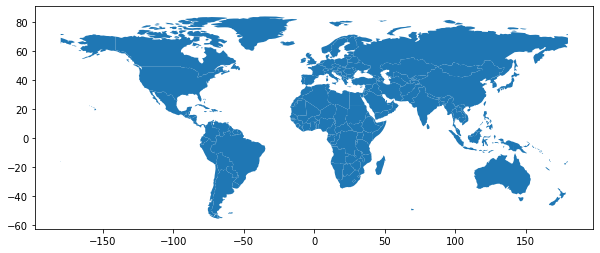

In [35]:
gdf = gdf[gdf.NAME != 'Antarctica']
gdf.plot(figsize=(10, 5));

In [36]:
xs = []
ys = []
for obj in gdf.geometry.boundary:
    if obj.type == 'LineString':
        obj_x, obj_y = obj.xy
        xs.append([[list(obj_x)]])
        ys.append([[list(obj_y)]])
    elif obj.type == 'MultiLineString':
        obj_x = []
        obj_y = []
        for line in obj:
            line_x, line_y = line.xy
            obj_x.append([list(line_x)])
            obj_y.append([list(line_y)])
        xs.append(obj_x)
        ys.append(obj_y)

country = gdf['NAME'].values        

df3_plot = pd.DataFrame({'country': country, 'xs': xs, 'ys': ys, 'count': float('nan')})

df3_plot.head()

,country,xs,ys,count
0,Afghanistan,"[[[61.210817, 62.230651, 62.984662, 63.193538,...","[[[35.650072, 35.270664, 35.404041, 35.857166,...",NaN
1,Angola,"[[[23.904154, 24.079905, 23.930922, 24.016137,...","[[[-11.722282, -12.191297, -12.565848, -12.911...",NaN
2,Albania,"[[[21.02004, 20.99999, 20.674997, 20.615, 20.1...","[[[40.842727, 40.580004, 40.435, 40.110007, 39...",NaN
3,United Arab Emirates,"[[[51.579519, 51.757441, 51.794389, 52.577081,...","[[[24.245497, 24.294073, 24.019826, 24.177439,...",NaN
4,Argentina,"[[[-66.95992, -67.56244, -68.63335, -68.63401,...","[[[-54.89681, -54.87001, -54.8695, -52.63637, ...",NaN


In [37]:
# Create the ColumnDataSource object "s3_plot"
s3_plot = ColumnDataSource(df3_plot)

# Create the Figure object "p4_test"
p4_test = figure(plot_width=775, plot_height=350,
                 toolbar_location=None, tools=['hover', 'pan', 'wheel_zoom'],
                 active_scroll='wheel_zoom', tooltips='@country')

# Add multipolygons to "p4_test"
p4_test.multi_polygons(xs='xs', ys='ys', fill_color='count', source=s3_plot)

# Change parameters of "p4_test"
p4_test.axis.visible = False
p4_test.grid.grid_line_color = None

# Create the custom JavaScript callback
callback3_test = CustomJS(args=dict(p4_test=p4_test), code='''
    p3_test.reset.emit();
''')    

# When clicking on the button execute "callback3_test"
button = Button(label='Reset view')
button.js_on_click(callback3_test)

In [38]:
DF11 = DF3[['Year', 'CountryOfOrigin']].copy()
DF12 = DF11[(DF11['Year']>='1990')]
DF12.head()

,Year,CountryOfOrigin
3,2018,United Kingdom
92,2005,United Kingdom
93,2003,United Kingdom
94,2003,United Kingdom
95,2005,United Kingdom


In [39]:
DF12.CountryOfOrigin.unique()

array(['United Kingdom', 'RUSSIA', 'UNITED STATES', 'VIRGIN ISLANDS',
       'CANADA', 'HONG KONG', 'ITALY', 'FRANCE', 'UNITED KINGDOM',
       'BAHAMAS', 'CAYMAN ISLANDS', 'Netherlands', 'Luxembourg'],
      dtype=object)

In [40]:
# Replace the name of countries to make it readable for python
to_replace = [('RUSSIA', 'Russia'), ('UNITED STATES', 'United States of America'),
              ('CANADA', 'Canada'), ('HONG KONG', 'China'),
              ('Channel Islands', 'United Kingdom'), ('ITALY', 'Italy'),
              ('FRANCE', 'France'), ('UNITED KINGDOM', 'United Kingdom'),
              ('VIRGIN ISLANDS', 'United Kingdom'), ('BAHAMAS', 'Bahamas'),
              ('Russian Empire', 'Russia'), ('Russian Empire[note 6]', 'Finland'),
              ('CAYMAN ISLANDS', 'United Kingdom')]

for old, new in to_replace:
    DF12.loc[DF12.CountryOfOrigin == old, 'CountryOfOrigin'] = new
    
DF12.CountryOfOrigin.unique()

C:\Users\35196\anaconda3\envs\smm635_gp\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-40-eae8f888efd5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF12.loc[DF12.CountryOfOrigin == old, 'CountryOfOrigin'] = new


array(['United Kingdom', 'Russia', 'United States of America', 'Canada',
       'China', 'Italy', 'France', 'Bahamas', 'Netherlands', 'Luxembourg'],
      dtype=object)

In [41]:
DF13 = pd.get_dummies(DF12, columns=['CountryOfOrigin'], prefix='', prefix_sep='')

DF13 = DF13.groupby('Year', as_index=False).sum()

DF13.head()

,Year,Bahamas,Canada,China,France,Italy,Luxembourg,Netherlands,Russia,United Kingdom,United States of America
0,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,182.0,1.0
1,1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,193.0,1.0
2,1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196.0,1.0
3,1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,211.0,0.0
4,1994,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,221.0,0.0


In [42]:
country = df3_plot['country']
diff = country[~country.isin(DF13.columns)].values
DF14 = pd.concat([DF13, pd.DataFrame(columns=diff)], axis=1).fillna(0)
DF14 = DF14.loc[:, np.append(['Year'], country.values)]
DF14.head()

,Year,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,Fr. S. Antarctic Lands,Australia,Austria,...,Uruguay,United States of America,Uzbekistan,Venezuela,Vietnam,Vanuatu,Yemen,South Africa,Zambia,Zimbabwe
0,1990,0,0,0,0,0,0,0,0,0,...,0,1.0,0,0,0,0,0,0,0,0
1,1991,0,0,0,0,0,0,0,0,0,...,0,1.0,0,0,0,0,0,0,0,0
2,1992,0,0,0,0,0,0,0,0,0,...,0,1.0,0,0,0,0,0,0,0,0
3,1993,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
4,1994,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0


In [43]:
# Create the ColumnDataSource objects "s3_plot" and "s3"
s3_plot = ColumnDataSource(df3_plot)
s3 = ColumnDataSource(DF14)

# Reverse the palette and create a linear color map
Blues8.reverse()
cmap = linear_cmap('count', palette=Blues8, low=0, high=1)

# Create the Figure object "p4"
p4 = figure(plot_width=775, plot_height=350,
            toolbar_location=None, tools=['hover', 'pan', 'wheel_zoom'],
            active_scroll='wheel_zoom', tooltips='@country: @count')

# Add multipolygons to "p4"
p4.multi_polygons(xs='xs', ys='ys', fill_color=cmap, source=s3_plot)

# Change parameters of "p4"
p4.axis.visible = False
p4.grid.grid_line_color = None

# Create the custom JavaScript callbacks
callback3_select = CustomJS(args=dict(s3=s3, s3_plot=s3_plot), code='''
    var country = s3_plot.data['country'];
    if (cb_obj.value != 'Please choose...') {
        var boat = s3.data['Year'];
        var ind = boat.indexOf(cb_obj.value);
        for (i = 0; i < country.length; i++) {
            s3_plot.data['count'][i] = s3.data[country[i]][ind];
        }
    }
    else {
        for (i = 0; i < country.length; i++) {
            s3_plot.data['count'][i] = undefined;
        }
    }
    s3_plot.change.emit();
''')

callback3_button = CustomJS(args=dict(p4=p4), code='''
    p4.reset.emit();
''')
    
# When changing the value of the dropdown menu execute "callback3_select"
options = ['Please choose...'] + list(s3.data['Year'])
select = Select(title='Year', value=options[0], options=options)
select.js_on_change('value', callback3_select)

# When clicking on the reset button execute "callback3_button"
button = Button(label='Reset view')
button.js_on_click(callback3_button)

In [44]:
output_file("InteractiveMap1.html")


# Create the custom JavaScript callback
callback4 = CustomJS(args=dict(s1=s1, s2=s2, s3=s3, s2_plot=s2_plot, s3_plot=s3_plot), code='''
    var ind = s1.selected.indices;
    var ang = ['1_ang', '2_ang', '3_ang', '4_ang', '5_ang', '6_ang'];
    var per = ['1_per', '2_per', '3_per', '4_per', '5_per', '6_per'];
    var country = s3_plot.data['country'];
    if (String(ind) != '') {
        for (i = 0; i < ang.length; i++) {
            s2_plot.data['angle'][i] = s2.data[ang[i]][ind];
            s2_plot.data['percent'][i] = s2.data[per[i]][ind];
        }
        for (i = 0; i < country.length; i++) {
            s3_plot.data['count'][i] = s3.data[country[i]][ind];
        }
    }
    else {
        for (i = 0; i < ang.length; i++) {
            s2_plot.data['angle'][i] = undefined;
            s2_plot.data['percent'][i] = undefined;
        }
        for (i = 0; i < country.length; i++) {
            s3_plot.data['count'][i] = undefined;
        }
    }
    s2_plot.change.emit();
    s3_plot.change.emit();
''')    
    
# When tapping the plot "p2" execute "callback4"
p2.js_on_event('tap', callback4)

# Display "p2","p3", "p4" and "button" in the specified layout
Layout3 = layout(column(row(p2, p3), p4, button))

# Create two panels, one for each conference
west_panel = Panel(child=Layout1, title='Dynamic Visualization of Newly Launched Companies in London')
middle_panel = Panel(child=Layout2, title='Office Rent Evolution in Central London')
east_panel = Panel(child=Layout3, title='Interactive Graph of Newly Launched Companies in Tech city')

# Assign the panels to Tabs
tabs1 = Tabs(tabs=[west_panel,middle_panel,east_panel])

# Show the tabbed layout
show(tabs1)
